In [2]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

### Average Directional Index (ADX)
![alt text](ADXfomula.png "ADX Fomula")

In [3]:
data = pd.read_csv('../MyStrategy/GBPUSD_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
5011,2022-08-30 13:00:00+01:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 14:00:00+01:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 15:00:00+01:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 16:00:00+01:00,1.163399,1.167174,1.163399,1.165189,1.165189,0
5015,2022-08-30 17:00:00+01:00,1.165365,1.166521,1.164985,1.165189,1.165189,0


In [4]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

,open,high,low,close,adj close,volumn
timestamp,,,,,,
2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0
2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0
2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0
2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0
2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0
...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0


##### การใช้งาน
- บอกความแข็งแรงของแนวโน้ม
- ค่า +DI และ -DI ใช้วิเคราะห์หาทิศทางของเทรน 
- ADX > 25 หมายถึงเทรนแข็งแรง, ADX < 20 หมายถึงเทรนอ่อนแอ(อาจจะ Sideway)
- ช่วงไม่มีเทรนราคาอาจกำลังเปลี่ยนเทรนหรือมีความผันผวนสูง
- เส้น +DI ตัดขึ้นเหนือ -DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Long
- เส้น -DI ตัดขึ้นเหนือ +DI และ ADX > 25 หรือ 20 อาจเป็นสัญญาณเข้า Short
- ใช้เป็นสัญญาณ Exit เช่น Long อยู่แล้วเส้น -DI ตัดขึ้น +DI
- การเกิด Divergence ของ ADX เป็นการแสดงถึงความเป็นแนวโน้มเริ่มอ่อนแรงลง
- สามารถประเมินโอกาสการ ผ่าน หรือ ไม่ผ่าน แนวรับ / แนวต้าน

##### ข้อจำกัด
- เส้น +DI, -DI ตัดกันอาจเกิดขึ้นบ่อยและบางครั้งเป็น False signal

อ้างอิงจาก 
* https://www.investopedia.com/terms/a/adx.asp
* https://thaibrokerforex.com/%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%80%E0%B8%A5%E0%B9%88%E0%B8%99%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%AD%E0%B8%B4%E0%B8%99%E0%B8%94%E0%B8%B4/
* https://www.cwayinvestment.com/2012/06/average-directional-index-adx.html
* https://admiralmarkets.sc/th/education/articles/forex-indicators/adx-forex-indicator
* https://forexthai.in.th/adx-%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%AD%E0%B8%B0%E0%B9%84%E0%B8%A3/
* https://www.lucid-trader.com/average-directional-index-adx/

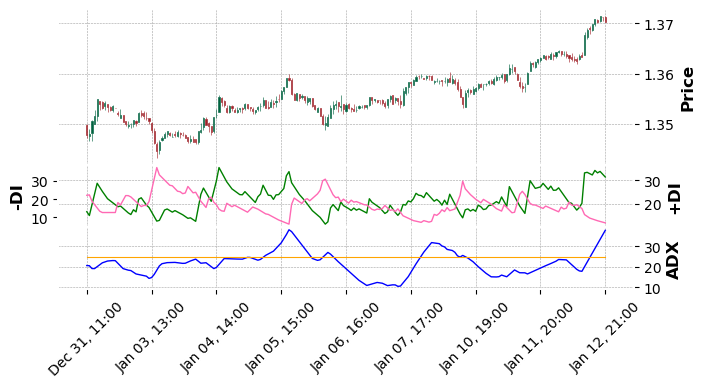

In [5]:
df.ta.adx(14, append=True)
start_date, end_date = '2021-12-31 10:45:00', '2022-01-12 21:45:00'

adx = df['ADX_14'].loc[start_date: end_date]
adxDMP= df['DMP_14'].loc[start_date: end_date]
adxDMN = df['DMN_14'].loc[start_date: end_date]

df_plot = df.loc[start_date: end_date]
adx_level = np.empty(df_plot.shape[0])
adx_level.fill(25)

adx_plot = mpf.make_addplot(adx, panel=2, color='blue', width=1, ylabel='ADX')
level_plot = mpf.make_addplot(adx_level, panel=2, color='orange', width=0.8)
adxDMP_plot = mpf.make_addplot(adxDMP, panel=1, color='green', width=1, ylabel='+DI')
adxDMN_plot = mpf.make_addplot(adxDMN, panel=1, color='hotpink', width=1, ylabel='-DI')

mpf.plot(df_plot, type='candle', style='charles',
         addplot=[adx_plot, level_plot, adxDMP_plot, adxDMN_plot],
         figsize=(8, 4))

##### ทดลองและสังเกตุว่าเหตุการณ์ใน ADX ส่งผลอะไรกับราคาสรุปออกมาเป็นสถิติ

ตัวอย่างผลที่เกิดขึ้น เช่น [x]swing, [x]แนวรับ, [x]แนวต้าน, [x]ราคาผันผวน, [x]sideway, [x]เทรนไปต่อ, [x]จุดสิ้นสุดเทรน

- [ ] +DI ตัดขึ้น -DI 
- [ ] -DI ตัดขึ้น +DI
- [ ] ADX > 25
- [ ] ADX < 20
- [ ] 20 < ADX < 25
- [ ] +DI ตัดขึ้น -DI และสังเกตุค่า ADX 
- [ ] -DI ตัดขึ้น +DI และสังเกตุค่า ADX

In [140]:
df['prev_DMP'] = df['DMP_14'].shift(1)
df['prev_DMN'] = df['DMN_14'].shift(1)
df['prev_ADX'] = df['ADX_14'].shift(1)

df['DMP_cross'] = (df['prev_DMP'] < df['prev_DMN']) & (df['DMP_14'] > df['DMN_14']) 
df['DMN_cross'] = (df['prev_DMP'] > df['prev_DMN']) & (df['DMP_14'] < df['DMN_14'])
df['ADX_over25'] = (df['prev_ADX'] < 25) & (df['ADX_14'] > 25) 
df['ADX_below20'] = (df['prev_ADX'] > 20) & (df['ADX_14'] < 20) 
df['ADX_20_25'] = ((df['prev_ADX'] > 25) & (df['ADX_14'] < 25) & (df['ADX_14'] > 20)) | ((df['prev_ADX'] < 20) & (df['ADX_14'] > 20) & (df['ADX_14'] < 25)) 

In [143]:
# df[df['ADX_20_25'] == True]
df[df['ADX_over25'] == True]
# df[df['ADX_below20'] == True]


,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross,prev_ADX,ADX_over25,ADX_below20,ADX_20_25
timestamp,,,,,,,,,,,,,,,,,
2021-11-08 23:00:00,1.356282,1.356502,1.355914,1.356337,1.356337,0,25.306865,29.137096,15.634160,29.913780,16.050907,False,False,24.909800,True,False,False
2021-11-10 13:00:00,1.350822,1.351242,1.348490,1.350785,1.350785,0,25.027286,8.190138,33.701679,9.224958,34.032694,False,False,22.258037,True,False,False
2021-11-18 02:00:00,1.348963,1.350384,1.348963,1.349619,1.349619,0,25.223501,25.915651,13.084060,22.810246,13.945187,False,False,24.632866,True,False,False
2021-11-22 18:00:00,1.339298,1.339764,1.338455,1.339316,1.339316,0,25.373022,8.801501,29.052058,9.257469,27.365085,False,False,23.209632,True,False,False
2021-11-24 10:00:00,1.335417,1.336916,1.335399,1.335631,1.335631,0,25.701087,10.918399,23.865121,11.897881,26.006043,False,False,24.814951,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05 16:00:00,1.206185,1.208313,1.205749,1.207963,1.207963,0,25.742073,18.631879,39.103245,14.262002,42.015198,False,False,24.994742,True,False,False
2022-08-10 15:00:00,1.226422,1.227521,1.223915,1.224290,1.224290,0,27.657029,46.752871,6.727631,48.986086,7.407080,False,False,24.027508,True,False,False
2022-08-12 13:00:00,1.211651,1.214211,1.211328,1.214064,1.214064,0,25.413558,9.378255,29.704985,10.412872,32.982063,False,False,23.367770,True,False,False


In [91]:
df[df['DMP_cross'] == True]

def adx_plot(df, start, end):

    df_plot = df.iloc[start: end]
    adx = df_plot['ADX_14']
    adxDMP= df_plot['DMP_14']
    adxDMN = df_plot['DMN_14']

    adx_level = np.empty(df_plot.shape[0])
    adx_level.fill(25)
    adx_level_below = np.empty(df_plot.shape[0])
    adx_level_below.fill(20)

    ret = df_plot['close'].pct_change()
    vol_d = ret.rolling(window=12).std()*np.sqrt(24)

    up_markers = []
    down_markers = []

    for index, row in df_plot.iterrows():
        dmp_cross = row['DMP_cross']
        dmn_cross = row['DMN_cross']
        if dmp_cross == True:
            up_markers.append(row['low'] * 0.998)
            down_markers.append(np.nan)
        elif dmn_cross == True:
            up_markers.append(np.nan)
            down_markers.append(row['high'] * 1.002)
        else:
            up_markers.append(np.nan)
            down_markers.append(np.nan)

    up_plot = mpf.make_addplot(up_markers, type='scatter', marker='^', markersize=10, panel=0, color='green')
    down_plot = mpf.make_addplot(down_markers, type='scatter', marker='v', markersize=10, panel=0, color='red')

    adx_plot = mpf.make_addplot(adx, panel=2, color='blue', width=1, ylabel='ADX')
    level_plot = mpf.make_addplot(adx_level, panel=2, color='orange', width=0.8)
    level_below_plot = mpf.make_addplot(adx_level_below, panel=2, color='orange', width=0.8)
    adxDMP_plot = mpf.make_addplot(adxDMP, panel=1, color='green', width=1, ylabel='+DI')
    adxDMN_plot = mpf.make_addplot(adxDMN, panel=1, color='hotpink', width=1, ylabel='-DI')
    vol_plot = mpf.make_addplot(vol_d, panel=3, color='blue', width=0.8, ylabel='Voltality')

    return [adx_plot, level_plot, level_below_plot, adxDMP_plot, adxDMN_plot, up_plot, down_plot, vol_plot]

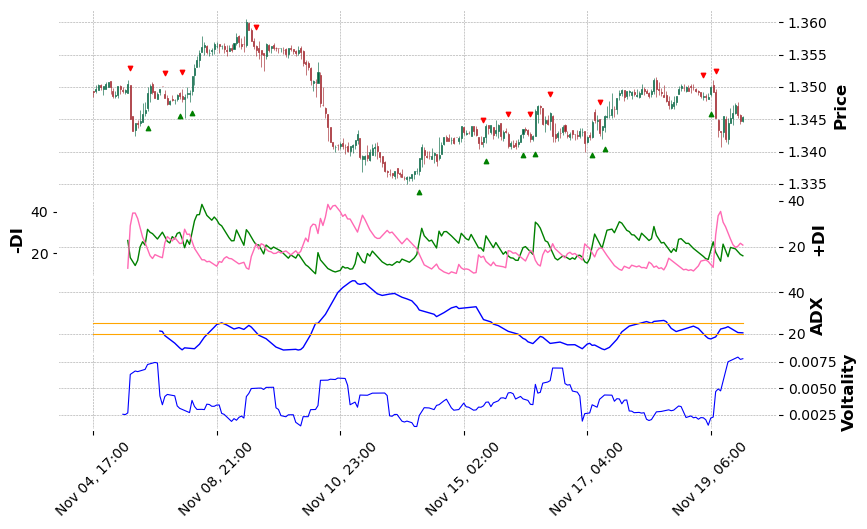

In [64]:
adx_info_plots = adx_plot(df, 0, 264)

mpf.plot(df.iloc[0:264], type='candle', style='charles',
         addplot=adx_info_plots,
         figsize=(10, 6))

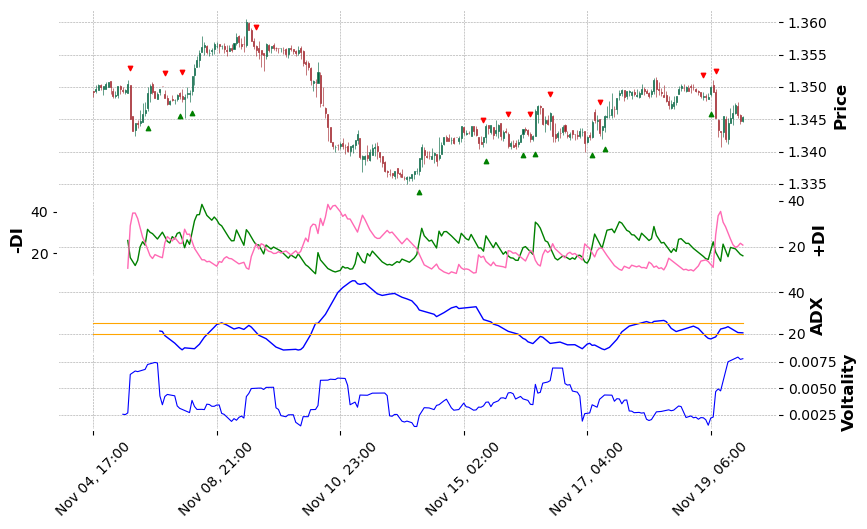

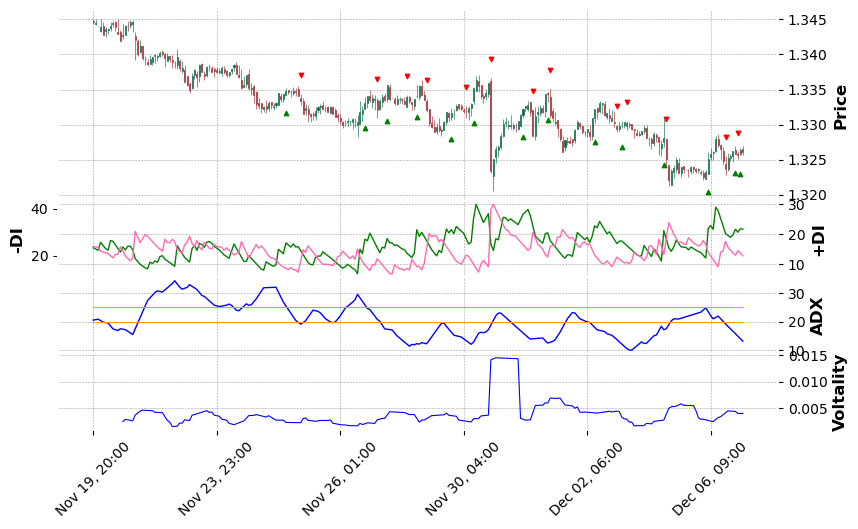

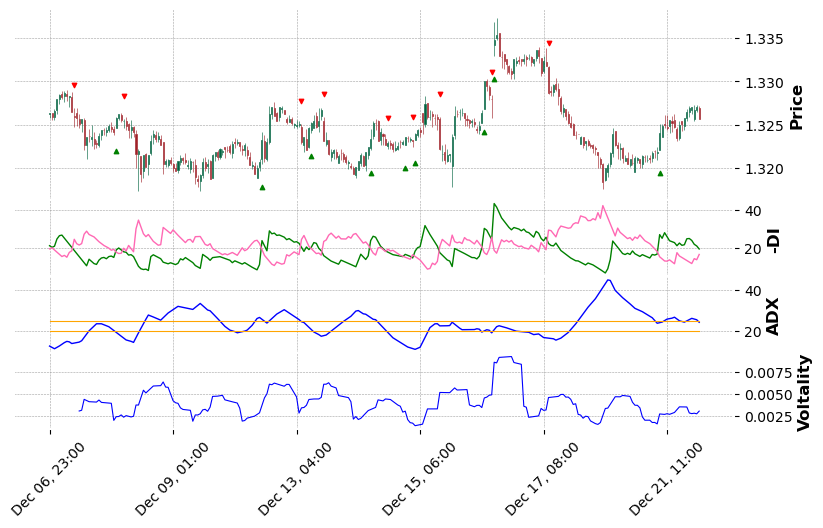

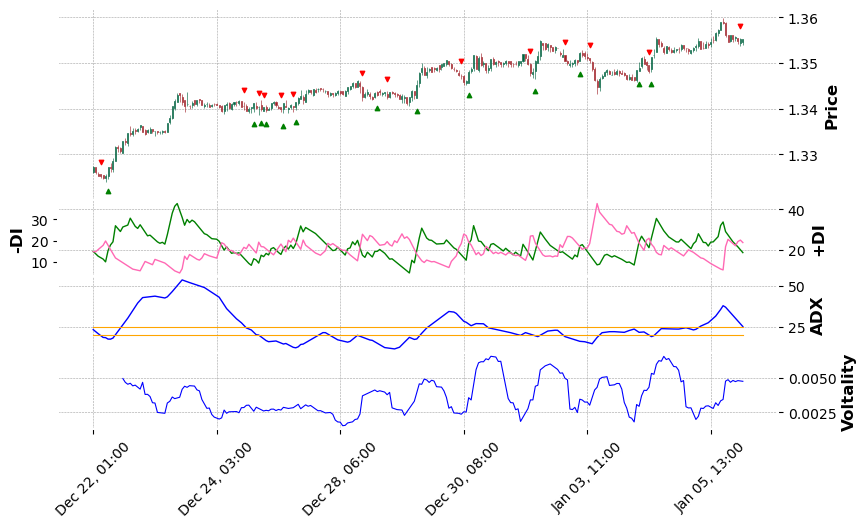

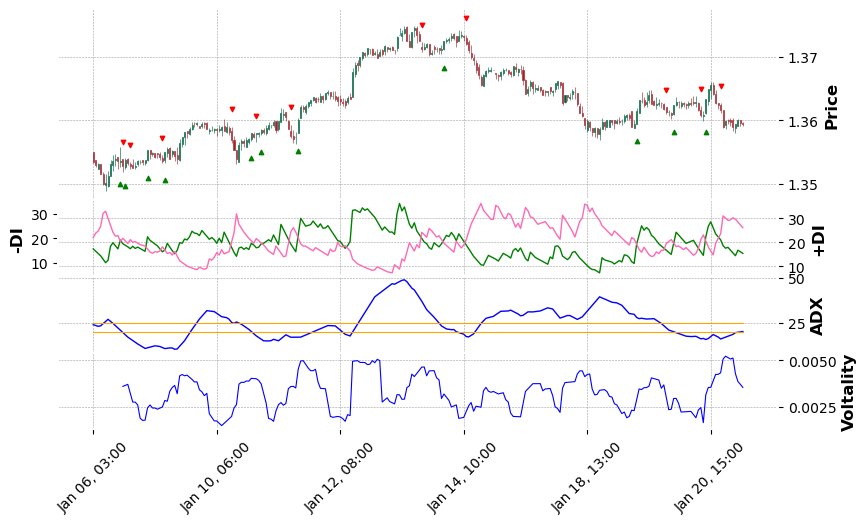

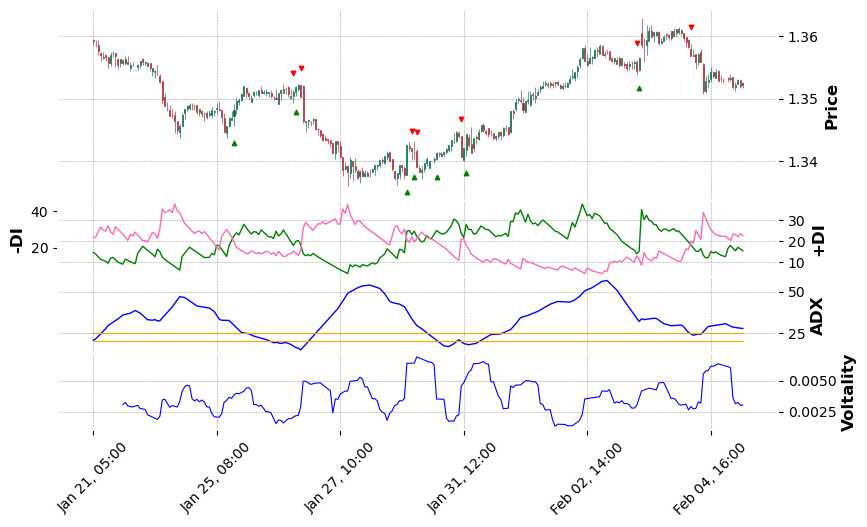

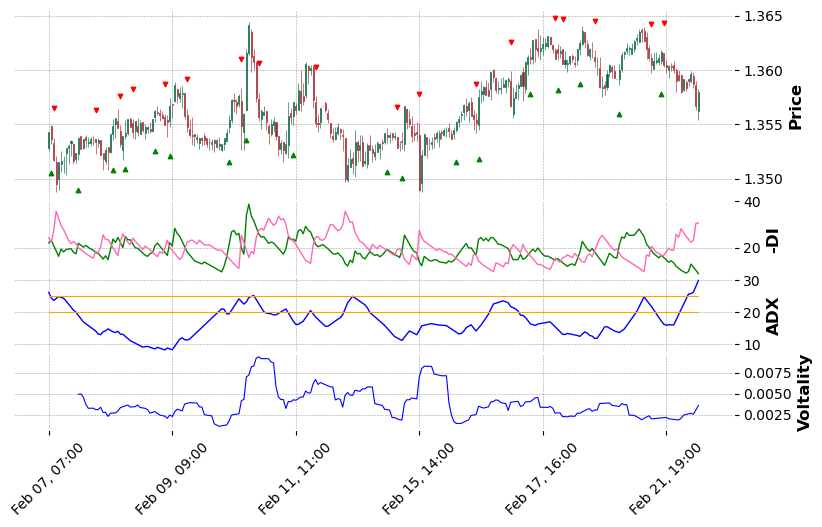

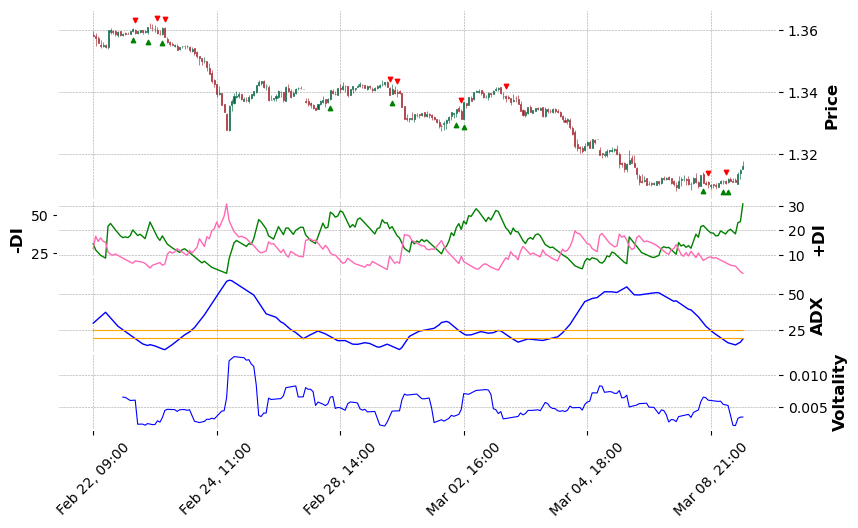

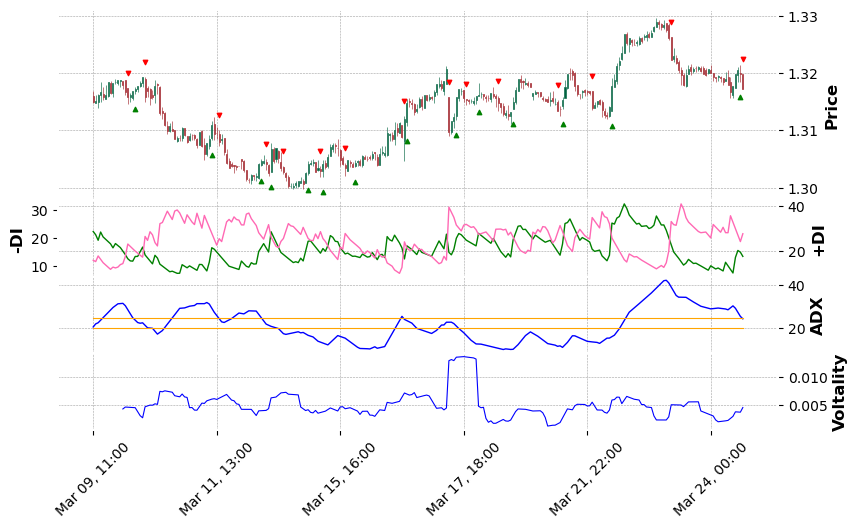

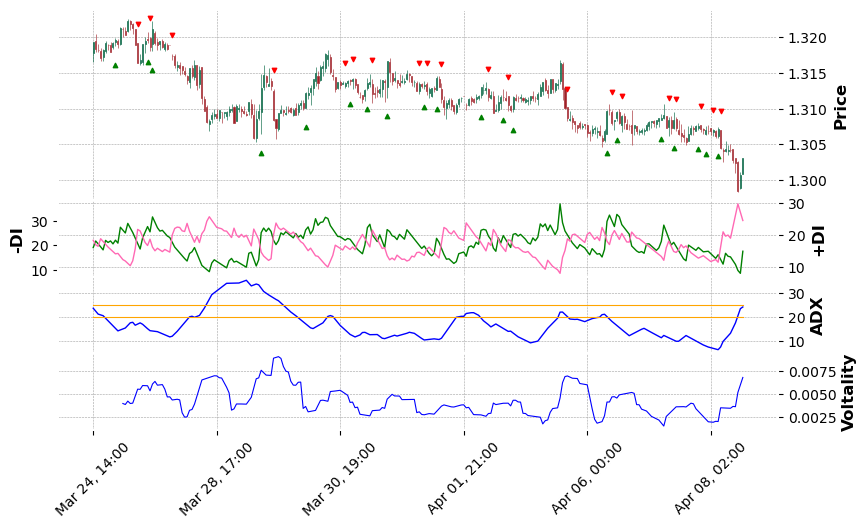

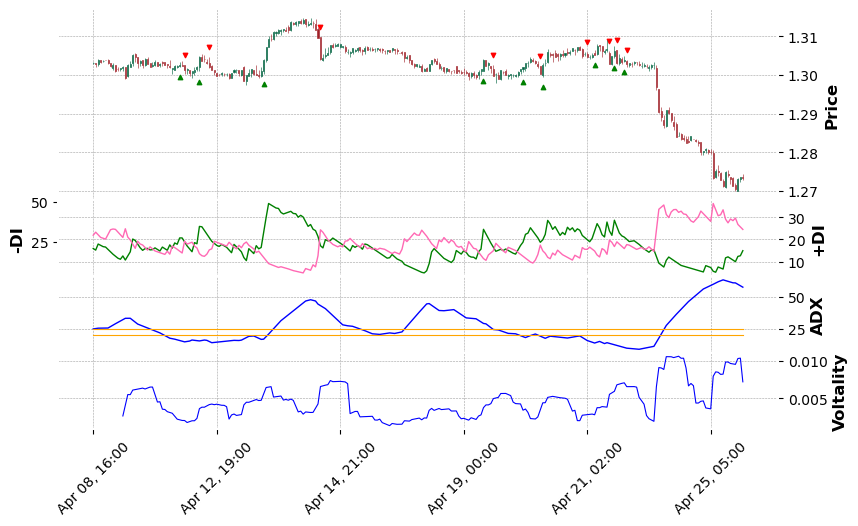

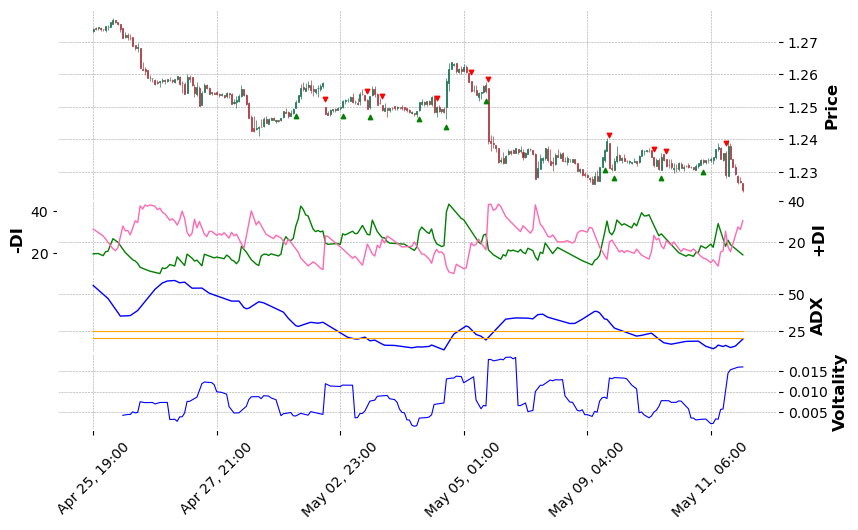

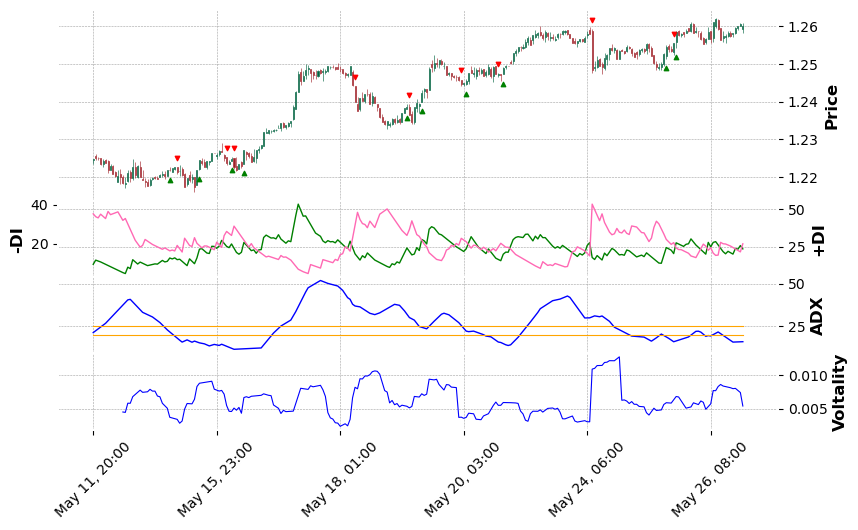

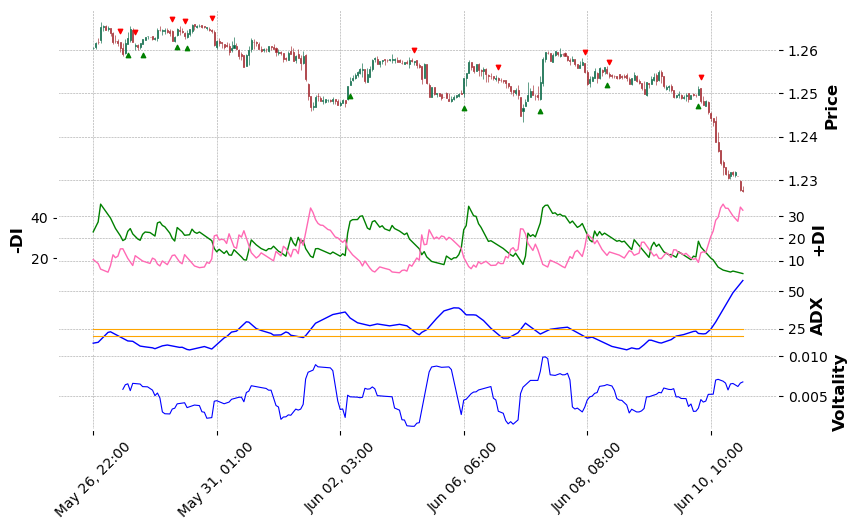

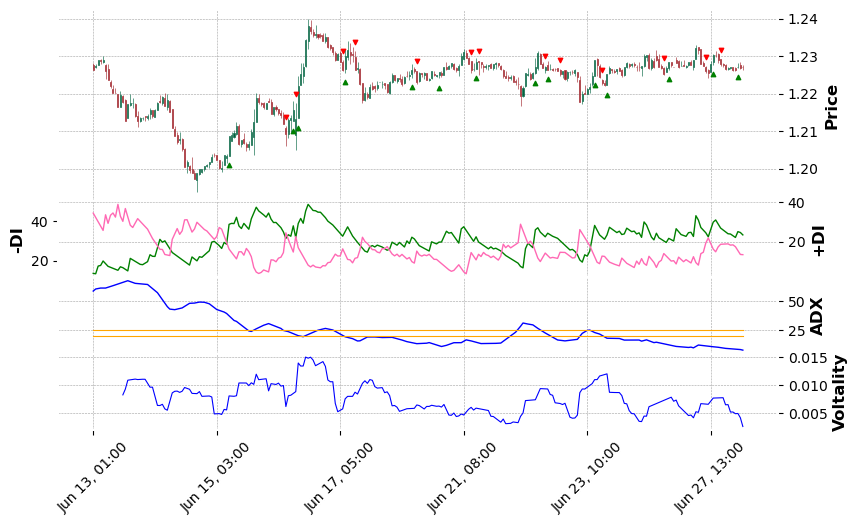

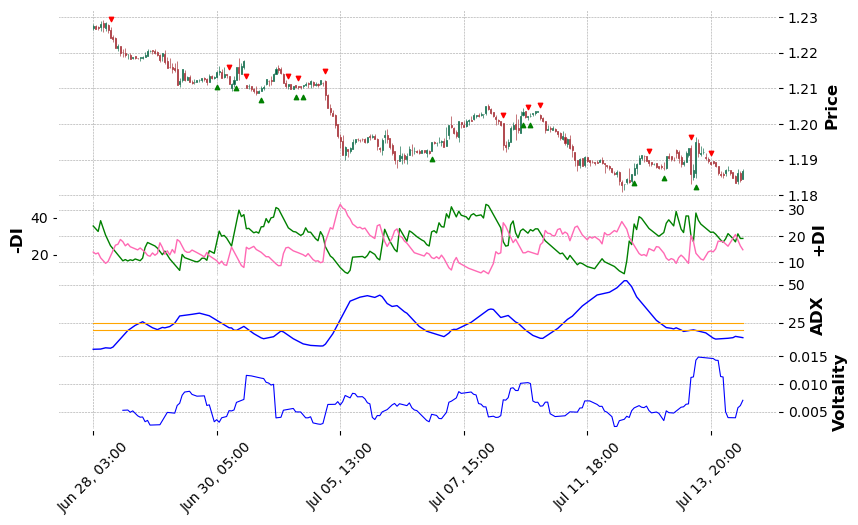

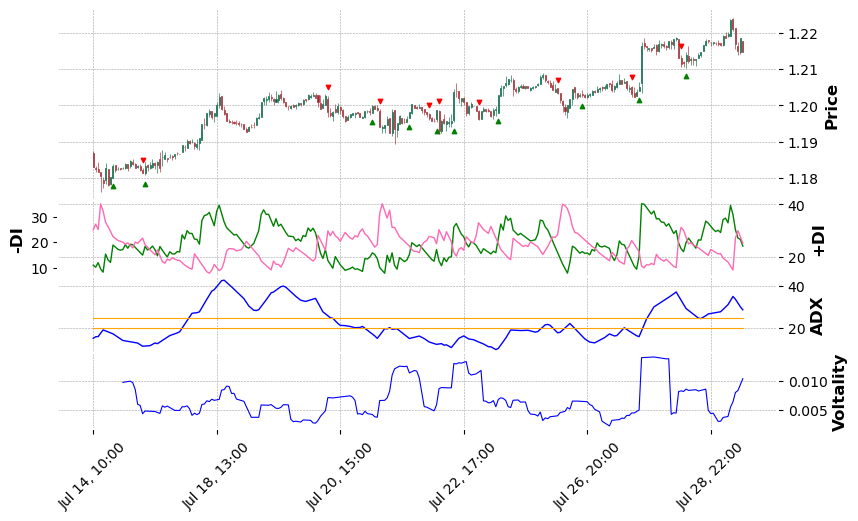

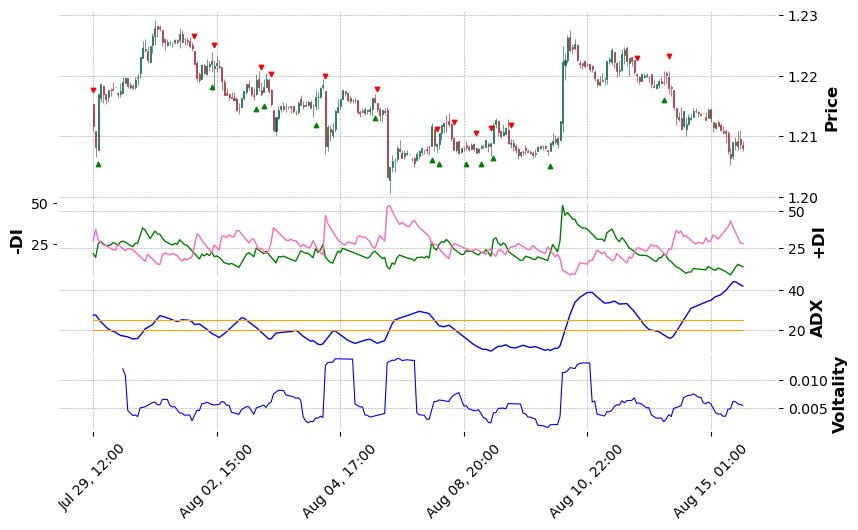

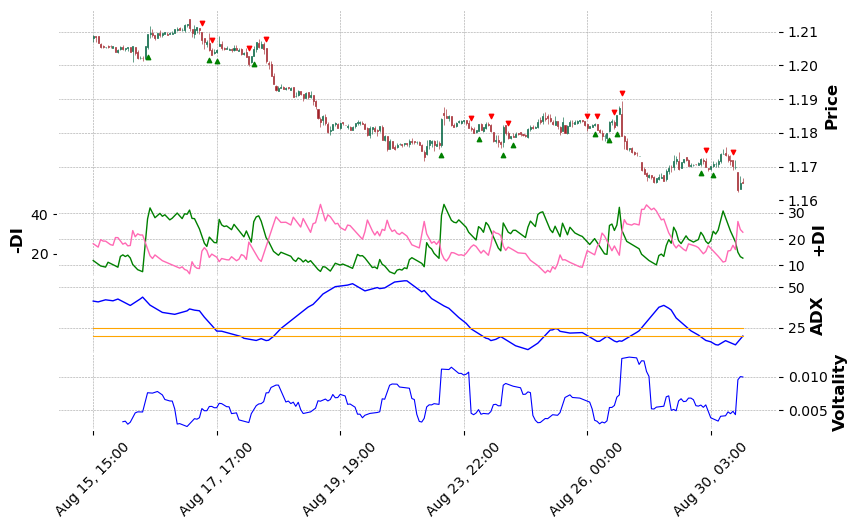

In [92]:
df_windows = np.linspace( 0, len(df), 20 )

for i in range(len(df_windows) - 1):
    start, end = int(df_windows[i]), int(df_windows[i+1])
    adx_info_plots = adx_plot(df, start, end)

    mpf.plot(df.iloc[start:end], type='candle', style='charles',
         addplot=adx_info_plots,
         figsize=(10, 6))

In [107]:
df[df['DMN_cross'] == True]

,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross
timestamp,,,,,,,,,,,,,
2021-11-05 08:00:00,1.350311,1.350311,1.345062,1.345062,1.345062,0,NaN,15.247818,33.243312,22.733981,12.820315,False,True
2021-11-08 00:00:00,1.348963,1.349491,1.348309,1.348309,1.348309,0,19.155614,24.068928,24.980064,26.354542,17.856083,False,True
2021-11-08 07:00:00,1.348545,1.349655,1.347600,1.348127,1.348127,0,12.308282,23.570211,24.873345,26.313785,24.681885,False,True
2021-11-09 13:00:00,1.356337,1.356502,1.354793,1.355693,1.355693,0,20.656124,20.837560,24.621483,22.358654,22.025086,False,True
2021-11-15 10:00:00,1.341436,1.342264,1.340752,1.342192,1.342192,0,26.887176,18.073735,18.591123,19.489408,17.997868,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26 04:00:00,1.182494,1.182550,1.180693,1.180819,1.180819,0,16.516649,18.647747,23.509281,20.191801,19.419868,False,True
2022-08-26 11:00:00,1.183096,1.183796,1.181154,1.181740,1.181740,0,16.714699,23.320335,23.945997,25.753490,21.482002,False,True
2022-08-26 14:00:00,1.185663,1.189471,1.179037,1.179106,1.179106,0,16.607445,23.411330,30.923366,32.158179,19.203251,False,True


In [10]:
df[df['ADX_14'] > 25]

,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross
timestamp,,,,,,,,,,,,,
2021-11-08 23:00:00,1.356282,1.356502,1.355914,1.356337,1.356337,0,25.306865,29.137096,15.634160,29.913780,16.050907,False,False
2021-11-09 00:00:00,1.356337,1.356760,1.355252,1.355859,1.355859,0,25.029498,27.189789,17.521404,29.137096,15.634160,False,False
2021-11-10 13:00:00,1.350822,1.351242,1.348490,1.350785,1.350785,0,25.027286,8.190138,33.701679,9.224958,34.032694,False,False
2021-11-10 14:00:00,1.350676,1.353913,1.350676,1.352338,1.352338,0,25.076053,17.439043,29.508196,8.190138,33.701679,False,False
2021-11-10 15:00:00,1.351826,1.352247,1.346928,1.347546,1.347546,0,26.443227,14.247991,36.784979,17.439043,29.508196,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29 12:00:00,1.169946,1.173406,1.168880,1.171729,1.171729,0,33.389192,24.556379,24.674173,18.421699,28.451107,False,False
2022-08-29 13:00:00,1.171660,1.173144,1.170713,1.172182,1.172182,0,31.021341,22.805311,22.914706,24.556379,24.674173,False,False
2022-08-29 14:00:00,1.171687,1.174398,1.168880,1.169235,1.169235,0,29.623919,19.419867,24.445743,22.805311,22.914706,False,False


In [11]:
df[df['ADX_14'] < 20]

,open,high,low,close,adj close,volumn,ADX_14,DMP_14,DMN_14,prev_DMP,prev_DMN,DMP_cross,DMN_cross
timestamp,,,,,,,,,,,,,
2021-11-08 00:00:00,1.348963,1.349491,1.348309,1.348309,1.348309,0,19.155614,24.068928,24.980064,26.354542,17.856083,False,True
2021-11-08 01:00:00,1.348309,1.348800,1.347255,1.347346,1.347346,0,18.368377,22.364799,28.041022,24.068928,24.980064,False,False
2021-11-08 02:00:00,1.347436,1.347927,1.347255,1.347782,1.347782,0,17.679140,21.646784,27.140773,22.364799,28.041022,False,False
2021-11-08 03:00:00,1.348163,1.348690,1.347909,1.347963,1.347963,0,16.288220,24.432752,25.928325,21.646784,27.140773,False,False
2021-11-08 04:00:00,1.348036,1.348181,1.347364,1.348054,1.348054,0,15.543092,23.419277,27.617556,24.432752,25.928325,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0,14.885273,20.813032,24.268973,23.079017,21.600817,False,True
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0,14.369603,18.949262,22.095730,20.813032,24.268973,False,False
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0,16.321748,14.978273,36.404836,18.949262,22.095730,False,False


In [12]:
def find_peak(price, i, order):
    
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=order)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=order)[0])

    idx = max_idx + min_idx + [len(price.values[:i]) - 1]
    idx.sort()
    current_idx = idx[-6:]
    
    start = min(current_idx)
    end = max(current_idx)
    
    current_pat = price.values[current_idx]
    
    return current_pat, current_idx, start, end

In [53]:
def find_trend(current_pat):
    
    if current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
        current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
        current_pat[2] < current_pat[4] and current_pat[3] > current_pat[4]:
        
        return 'up'

    elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
        current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
        current_pat[2] > current_pat[4] and current_pat[3] < current_pat[4]:
        
        return 'down'

    elif current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
        current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
        current_pat[2] > current_pat[4] and current_pat[3] > current_pat[4]:
        
        return 'up end'

    elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
        current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
        current_pat[2] < current_pat[4] and current_pat[3] < current_pat[4]:
        
        return 'down end'

    else:
        return False

In [174]:
price = df['close'].copy()
for i in range(1200, 1250):
    
     current_pat, current_idx, start, end = find_peak(price, i, 10)
     peak_lines = [(price.index[current_idx[i]], current_pat[i]) for i in range(len(current_pat))]
     trend = find_trend(current_pat) # , err_allowed)
     # print(current_pat)
    
     if trend is not False:
        
          print(trend)
          mpf.plot(df.iloc[start:i+15], type='candle', style='charles',
               # addplot=adx_info_plots,
               alines=dict(alines=peak_lines,colors=['blue'], linewidths=0.8),
               figsize=(10, 6))

[1.35394955 1.3571099  1.36239779 1.37460828 1.37038863 1.37272131]
[1.35394955 1.3571099  1.36239779 1.37460828 1.37038863 1.37283432]
[1.35394955 1.3571099  1.36239779 1.37460828 1.37038863 1.37332451]
[1.3571099  1.36239779 1.37460828 1.37038863 1.37332451 1.37298512]
[1.3571099  1.36239779 1.37460828 1.37038863 1.37332451 1.37240112]
[1.3571099  1.36239779 1.37460828 1.37038863 1.37332451 1.37326801]
[1.35394955 1.3571099  1.36239779 1.37460828 1.37038863 1.3735131 ]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.37309825]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.37200558]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.37100863]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.37001312]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.36948788]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.36800778]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3735131  1.36711013]
[1.3571099  1.36239779 1.37460828 1.37038863 1.3

In [115]:
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['high'] - df['low'])    
  return np.sum([abs(value-level)<ave for _,level,_ in levels])==0

In [116]:
def find_support_resistance(df):
  levels = []
  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['high'][i-5:i+4]
      current_max = high_range.max()
      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max, 'resistance'))
      
      low_range = df['low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min, 'support'))
  return levels

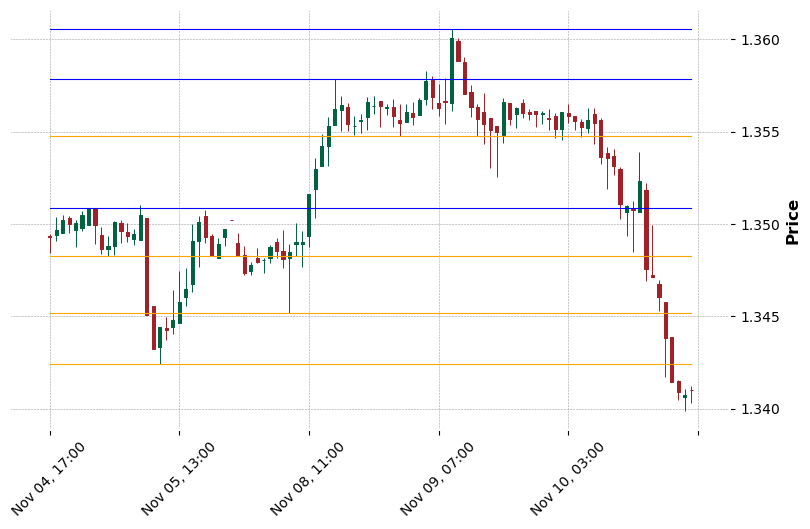

In [122]:
start, end = 0, 100
df_plot = df.iloc[start:end]
supp_resist = find_support_resistance(df_plot)

supp_resist_plots = []
for line in supp_resist:

     supp_resist_line = np.empty( df_plot.shape[0] )
     supp_resist_line.fill(line[1])
     color_plot = 'orange' if line[2] == 'support' else 'blue'
     level_plot = mpf.make_addplot(supp_resist_line, panel=0, color=color_plot, width=0.8)
     supp_resist_plots.append(level_plot)

mpf.plot(df.iloc[start:end], type='candle', style='charles',
     addplot=supp_resist_plots,
     # alines=dict(alines=level_lines,colors=['blue'], linewidths=0.8),
     figsize=(10, 6))

<AxesSubplot:xlabel='timestamp'>

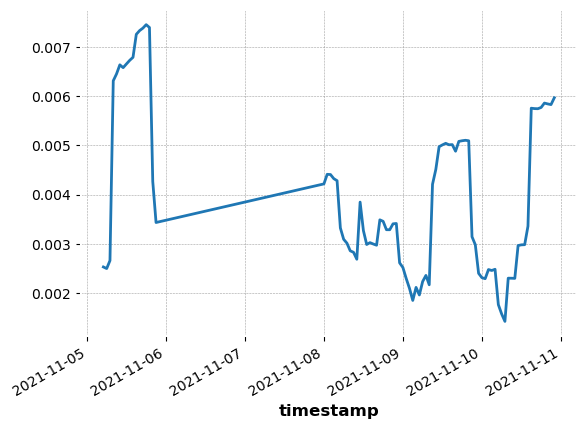

In [147]:
price = df_plot['close']
ret = price.pct_change()
vol_d = ret.rolling(window=12).std()*np.sqrt(24)
vol_d.plot() 

In [214]:
# event then support, resistance, sideway, trend, break trend

class ADX_Experiment:
    def __init__(self, params):
        self.adx = params['adx']
        self.df = params['df']
        self.next_bars = 50

        self.event_info = pd.DataFrame(data={
            'amount': [0, 0, 0, 0, 0],
            'support': [0, 0, 0, 0, 0],
            'resistance': [0, 0, 0, 0, 0],
            'up_trend': [0, 0, 0, 0, 0],
            'down_trend': [0, 0, 0, 0, 0],
            'break_up_trend': [0, 0, 0, 0, 0],
            'break_down_trend': [0, 0, 0, 0, 0]
        }, index= ['DMP_cross', 'DMN_cross', 'ADX_over25', 'ADX_below20', 'ADX_20_25'])
        self.df.ta.adx(self.adx, append=True)

        self.df['prev_DMP'] = self.df['DMP_14'].shift(1)
        self.df['prev_DMN'] = self.df['DMN_14'].shift(1)
        self.df['prev_ADX'] = self.df['ADX_14'].shift(1)

        self.df['DMP_cross'] = (self.df['prev_DMP'] < self.df['prev_DMN']) & (self.df['DMP_14'] > self.df['DMN_14']) 
        self.df['DMN_cross'] = (self.df['prev_DMP'] > self.df['prev_DMN']) & (self.df['DMP_14'] < self.df['DMN_14'])
        self.df['ADX_over25'] = (self.df['prev_ADX'] < 25) & (self.df['ADX_14'] > 25) 
        self.df['ADX_below20'] = (self.df['prev_ADX'] > 20) & (self.df['ADX_14'] < 20) 
        
        self.df['ADX_20_25'] = ((self.df['prev_ADX'] > 25) & (self.df['ADX_14'] < 25) & (self.df['ADX_14'] > 20)) | \
            ((self.df['prev_ADX'] < 20) & (self.df['ADX_14'] > 20) & (self.df['ADX_14'] < 25)) 

    def set_next_bars(self, n):
        self.next_bars = n

    def find_peak(self, price, i, order):

        max_idx = list(argrelextrema(price.values[:i], np.greater, order=order)[0])
        min_idx = list(argrelextrema(price.values[:i], np.less, order=order)[0])

        idx = max_idx + min_idx + [len(price.values[:i]) - 1]
        idx.sort()
        current_idx = idx[-6:]
        
        start = min(current_idx)
        end = max(current_idx)
        
        current_pat = price.values[current_idx]
        
        return current_pat, current_idx, start, end

    def find_trend(self, current_pat):
        if len(current_pat) < 5:
            return False

        if current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
            current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
            current_pat[2] < current_pat[4] and current_pat[3] > current_pat[4]:
            
            return 'up'

        elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
            current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
            current_pat[2] > current_pat[4] and current_pat[3] < current_pat[4]:
            
            return 'down'

        elif current_pat[0] < current_pat[1] and current_pat[0] < current_pat[2] and current_pat[0] < current_pat[4] and \
            current_pat[1] > current_pat[2] and current_pat[1] < current_pat[3] and current_pat[2] < current_pat[3] and \
            current_pat[2] > current_pat[4] and current_pat[3] > current_pat[4]:
            
            return 'up end'

        elif current_pat[0] > current_pat[1] and current_pat[0] > current_pat[2] and current_pat[0] > current_pat[4] and \
            current_pat[1] < current_pat[2] and current_pat[1] > current_pat[3] and current_pat[2] > current_pat[3] and \
            current_pat[2] < current_pat[4] and current_pat[3] < current_pat[4]:
            
            return 'down end'

        else:
            return False

    def is_far_from_level(self, value, levels, df):    
        ave =  np.mean(df['high'] - df['low'])    
        return np.sum([abs(value-level)<ave for _,level,_ in levels])==0

    def find_support_resistance(self, df):
        levels = []
        max_list = []
        min_list = []
        for i in range(5, len(df)-5):
            high_range = df['high'][i-5:i+4]
            current_max = high_range.max()
            if current_max not in max_list:
                max_list = []
            max_list.append(current_max)
            if len(max_list) == 5 and self.is_far_from_level(current_max, levels, df):
                levels.append((high_range.idxmax(), current_max, 'resistance'))
            
            low_range = df['low'][i-5:i+5]
            current_min = low_range.min()
            if current_min not in min_list:
                min_list = []
            min_list.append(current_min)
            if len(min_list) == 5 and self.is_far_from_level(current_min, levels, df):
                levels.append((low_range.idxmin(), current_min, 'support'))
        return levels

    def count_event(self, event_name, window):
        self.event_info.loc[event_name]['amount'] = self.event_info.loc[event_name]['amount'] + 1

        current_pat, current_idx, start, end = self.find_peak(window['close'], i+self.next_bars, 10)
        peak_lines = [(price.index[current_idx[i]], current_pat[i]) for i in range(len(current_pat))]
        # print(i, current_pat)
        # break
        trend = self.find_trend(current_pat)
                
        if trend == 'up':
            self.event_info.loc[event_name]['up_trend'] = self.event_info.loc[event_name]['up_trend'] + 1
        elif trend == 'down':
            self.event_info.loc[event_name]['down_trend'] = self.event_info.loc[event_name]['down_trend'] + 1
        elif trend == 'up end':
            self.event_info.loc[event_name]['break_up_trend'] = self.event_info.loc[event_name]['break_up_trend'] + 1
        elif trend == 'down end':
            self.event_info.loc[event_name]['break_down_trend'] = self.event_info.loc[event_name]['break_down_trend'] + 1

        supp_resist = self.find_support_resistance(window)
        sum_support = 0
        sum_resistance = 0
        for line in supp_resist:
            if line[2] == 'support':
                sum_support = sum_support + 1
            else:
                sum_resistance = sum_resistance + 1

        self.event_info.loc[event_name]['support'] = self.event_info.loc[event_name]['support'] + sum_support
        self.event_info.loc[event_name]['resistance'] = self.event_info.loc[event_name]['resistance'] + sum_resistance

    def get_all_result(self):
        for i in range(self.adx, len(self.df) - self.next_bars):
            row = self.df.iloc[i]
            window = self.df.iloc[i: i+self.next_bars]

            if row['DMP_cross'] == True:
                self.count_event('DMP_cross', window)

            elif row['DMN_cross'] == True:
                self.count_event('DMN_cross', window)

            elif row['ADX_over25'] == True:
                self.count_event('ADX_over25', window)

            elif row['ADX_below20'] == True:
                self.count_event('ADX_below20', window)

            elif row['ADX_20_25'] == True:
                self.count_event('ADX_20_25', window) 
            
        return self.event_info


In [213]:
test = ADX_Experiment(params={ 'adx': 14, 'df': df.copy() })
test.get_all_result()

,amount,support,resistance,up_trend,down_trend,break_up_trend,break_down_trend
DMP_cross,223,401,386,11,14,0,1
DMN_cross,223,391,393,11,13,1,3
ADX_over25,71,134,117,0,9,1,0
ADX_below20,76,131,134,2,3,1,0
ADX_20_25,156,296,272,3,5,1,0
